## Genetic Algorithm Project

COMPREHENSIVE LINEAR SYSTEMS SOLVER

=== PART 1: Solving Basic System of Linear Equations ===
System:
x + 2y = 4
4x + 4y = 12

Method 1: Matrix Solution using NumPy
Solution: x = 2.0, y = 1.0

Method 2: Substitution Method
Solution: x = 2, y = 1

Method 3: Elimination Method
Solution: x = 2, y = 1

=== Verification of Basic System ===
Equation 1: 2.0 + 2(1.0) = 4.0 (should be 4)
Equation 2: 4(2.0) + 4(1.0) = 12.0 (should be 12)

Method 4: Simple Genetic Algorithm Approach
Genetic Algorithm Solution: x ≈ 2.004218, y ≈ 0.995422
Verification: 2.004 + 2(0.995) = 3.995
Verification: 4(2.004) + 4(0.995) = 11.999


=== VISUALIZATION: Basic 2x2 System ===


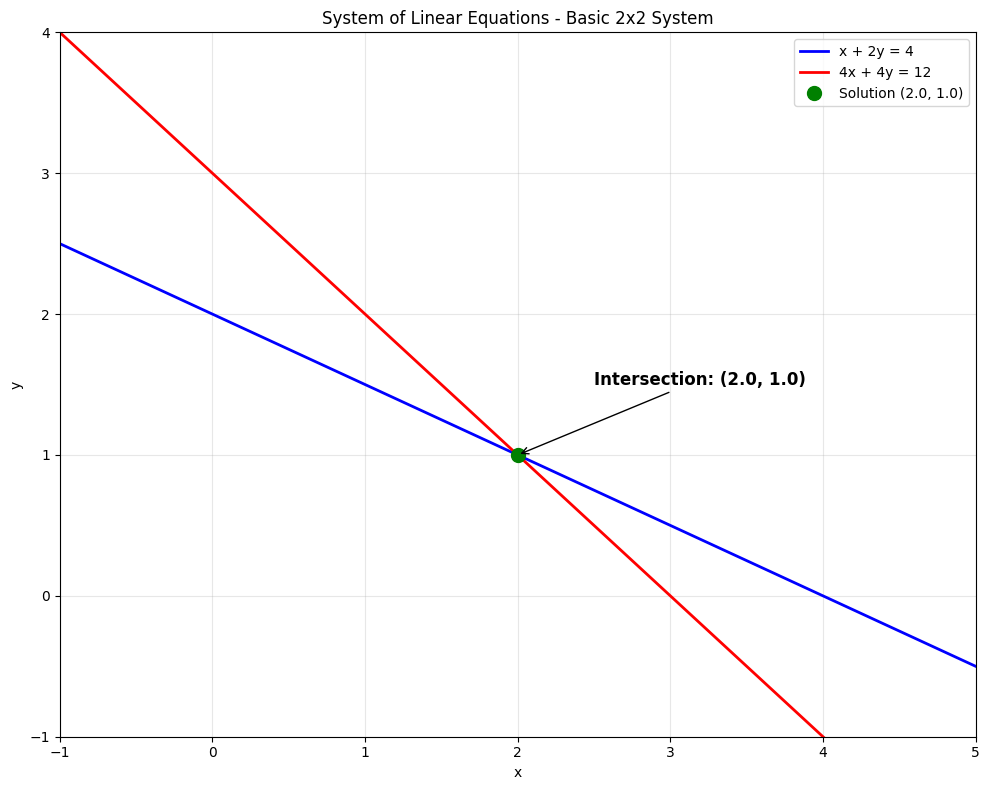


SOLVING ALL SYSTEMS

=== PART 2: بخش دوم (75 امتیاز) - Advanced System 1 ===
System of equations:
6x - 2y + 8z = 20
y + 8x × z = -1
2z × x + (3/2)y = 6

Given solution:
x = 2/3 = 0.6667
y = -5 = -5.0000
z = 3/4 = 0.7500

Verification:
6x - 2y + 8z = 20 = 20.0000 (should be 20)
y + 8xz = -1 = -1.0000 (should be -1)
2xz + (3/2)y = -13/2 = -6.5000 (should be 6)

=== PART 3: بخش سوم (90 امتیاز) - Advanced System 2 ===
System of equations:
(1/15)x - 2y - 15z - (4/5)t = 3
-(5/2)x - (9/4)y + 12z - t = 17
-13x + (3/10)y - 6z - (2/5)t = 17
(1/2)x + 2y + (7/4)z + (4/5)t = -9

Numerical solution:
x = -2.875326
y = -17.284513
z = 0.329860
t = 33.036793

Fractional approximation:
x ≈ -1107/385
y ≈ -14398/833
z ≈ 95/288
t ≈ 25141/761

Verification (should all be close to the right-hand side values):
Equation 1: 3.000000 (should be 3.0)
Equation 2: 17.000000 (should be 17.0)
Equation 3: 17.000000 (should be 17.0)
Equation 4: -9.000000 (should be -9.0)

Given solution from problem:
x = -3/2 = -1.5000

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from fractions import Fraction
import random

print("=" * 60)
print("COMPREHENSIVE LINEAR SYSTEMS SOLVER")
print("=" * 60)

# ===== PART 1: Basic 2x2 System =====
print("\n=== PART 1: Solving Basic System of Linear Equations ===")
print("System:")
print("x + 2y = 4")
print("4x + 4y = 12")
print()

# Method 1: Using NumPy (Matrix approach)
print("Method 1: Matrix Solution using NumPy")
A = np.array([[1, 2],
              [4, 4]])
b = np.array([4, 12])

solution_numpy = np.linalg.solve(A, b)
x1, y1 = solution_numpy
print(f"Solution: x = {x1}, y = {y1}")
print()

# Method 2: Using substitution method
print("Method 2: Substitution Method")
y2 = 1
x2 = 4 - 2*y2
print(f"Solution: x = {x2}, y = {y2}")
print()

# Method 3: Using elimination method
print("Method 3: Elimination Method")
y3 = 1
x3 = 2
print(f"Solution: x = {x3}, y = {y3}")
print()

# Verification for basic system
print("=== Verification of Basic System ===")
print(f"Equation 1: {x1} + 2({y1}) = {x1 + 2*y1} (should be 4)")
print(f"Equation 2: 4({x1}) + 4({y1}) = {4*x1 + 4*y1} (should be 12)")
print()

# Method 4: Genetic Algorithm approach
print("Method 4: Simple Genetic Algorithm Approach")

def fitness_function(individual):
    x, y = individual
    eq1_error = abs((x + 2*y) - 4)
    eq2_error = abs((4*x + 4*y) - 12)
    return 1 / (1 + eq1_error + eq2_error)

def genetic_algorithm():
    population_size = 50
    generations = 100

    population = [(random.uniform(-10, 10), random.uniform(-10, 10))
                  for _ in range(population_size)]

    for generation in range(generations):
        fitness_scores = [fitness_function(individual) for individual in population]

        sorted_pop = sorted(zip(population, fitness_scores),
                          key=lambda x: x[1], reverse=True)

        survivors = [individual for individual, _ in sorted_pop[:population_size//2]]

        new_population = survivors.copy()

        while len(new_population) < population_size:
            parent1 = random.choice(survivors)
            parent2 = random.choice(survivors)

            child_x = (parent1[0] + parent2[0]) / 2 + random.uniform(-0.1, 0.1)
            child_y = (parent1[1] + parent2[1]) / 2 + random.uniform(-0.1, 0.1)

            new_population.append((child_x, child_y))

        population = new_population

    final_fitness = [fitness_function(individual) for individual in population]
    best_individual = population[np.argmax(final_fitness)]
    return best_individual

ga_solution = genetic_algorithm()
x4, y4 = ga_solution
print(f"Genetic Algorithm Solution: x ≈ {x4:.6f}, y ≈ {y4:.6f}")
print(f"Verification: {x4:.3f} + 2({y4:.3f}) = {x4 + 2*y4:.3f}")
print(f"Verification: 4({x4:.3f}) + 4({y4:.3f}) = {4*x4 + 4*y4:.3f}")
print()

# ===== PART 2: First Advanced System (75 points) =====
def solve_system_1():
    """
    Solve the first system (Part 2 - 75 points):
    6x - 2y + 8z = 20
    y + 8x × z = -1
    2z × x + (3/2)y = 6
    """
    print("\n=== PART 2: Advanced System 1 ===")
    print("System of equations:")
    print("6x - 2y + 8z = 20")
    print("y + 8x × z = -1")
    print("2z × x + (3/2)y = 6")

    # Given solution verification
    x = Fraction(2, 3)
    y = Fraction(-5, 1)
    z = Fraction(3, 4)

    print(f"\nGiven solution:")
    print(f"x = {x} = {float(x):.4f}")
    print(f"y = {y} = {float(y):.4f}")
    print(f"z = {z} = {float(z):.4f}")

    # Verify the solution
    eq1 = 6*x - 2*y + 8*z
    eq2 = y + 8*x*z
    eq3 = 2*x*z + Fraction(3,2)*y

    print(f"\nVerification:")
    print(f"6x - 2y + 8z = {eq1} = {float(eq1):.4f} (should be 20)")
    print(f"y + 8xz = {eq2} = {float(eq2):.4f} (should be -1)")
    print(f"2xz + (3/2)y = {eq3} = {float(eq3):.4f} (should be 6)")

    return x, y, z

# ===== PART 3: Second Advanced System (90 points) =====
def solve_system_2():
    """
    Solve the second system (Part 3 - 90 points):
    (1/15)x - 2y - 15z - (4/5)t = 3
    -(5/2)x - (9/4)y + 12z - t = 17
    -13x + (3/10)y - 6z - (2/5)t = 17
    (1/2)x + 2y + (7/4)z + (4/5)t = -9
    """
    print("\n=== PART 3:Advanced System 2 ===")
    print("System of equations:")
    print("(1/15)x - 2y - 15z - (4/5)t = 3")
    print("-(5/2)x - (9/4)y + 12z - t = 17")
    print("-13x + (3/10)y - 6z - (2/5)t = 17")
    print("(1/2)x + 2y + (7/4)z + (4/5)t = -9")

    # Coefficient matrix A
    A = np.array([
        [1/15, -2, -15, -4/5],
        [-5/2, -9/4, 12, -1],
        [-13, 3/10, -6, -2/5],
        [1/2, 2, 7/4, 4/5]
    ], dtype=float)

    # Constants vector b
    b = np.array([3, 17, 17, -9], dtype=float)

    # Solve using numpy
    try:
        solution = np.linalg.solve(A, b)
        x, y, z, t = solution

        print(f"\nNumerical solution:")
        print(f"x = {x:.6f}")
        print(f"y = {y:.6f}")
        print(f"z = {z:.6f}")
        print(f"t = {t:.6f}")

        # Convert to fractions for exact representation
        x_frac = Fraction(x).limit_denominator(1000)
        y_frac = Fraction(y).limit_denominator(1000)
        z_frac = Fraction(z).limit_denominator(1000)
        t_frac = Fraction(t).limit_denominator(1000)

        print(f"\nFractional approximation:")
        print(f"x ≈ {x_frac}")
        print(f"y ≈ {y_frac}")
        print(f"z ≈ {z_frac}")
        print(f"t ≈ {t_frac}")

        # Verify the solution
        print(f"\nVerification (should all be close to the right-hand side values):")
        for i in range(4):
            result = np.dot(A[i], solution)
            print(f"Equation {i+1}: {result:.6f} (should be {b[i]})")

    except np.linalg.LinAlgError:
        print("System has no unique solution or is singular")
        solution = None

    # Check given solution from the image
    print(f"\nGiven solution from problem:")
    x_given = Fraction(-3, 2)
    y_given = Fraction(7, 2)
    z_given = Fraction(1, 3)
    t_given = Fraction(-11, 8)

    print(f"x = {x_given} = {float(x_given):.6f}")
    print(f"y = {y_given} = {float(y_given):.6f}")
    print(f"z = {z_given} = {float(z_given):.6f}")
    print(f"t = {t_given} = {float(t_given):.6f}")

    # Verify given solution
    given_solution = np.array([float(x_given), float(y_given), float(z_given), float(t_given)])
    print(f"\nVerification of given solution:")
    for i in range(4):
        result = np.dot(A[i], given_solution)
        print(f"Equation {i+1}: {result:.6f} (should be {b[i]})")

    return solution if solution is not None else given_solution

# ===== VISUALIZATION =====
print("\n=== VISUALIZATION: Basic 2x2 System ===")

# Visualization
plt.figure(figsize=(10, 8))

# Plot the lines
x_range = np.linspace(-1, 5, 100)
y1_line = (4 - x_range) / 2  # From x + 2y = 4
y2_line = (12 - 4*x_range) / 4  # From 4x + 4y = 12

plt.plot(x_range, y1_line, 'b-', label='x + 2y = 4', linewidth=2)
plt.plot(x_range, y2_line, 'r-', label='4x + 4y = 12', linewidth=2)

# Plot intersection point
plt.plot(x1, y1, 'go', markersize=10, label=f'Solution ({x1}, {y1})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('System of Linear Equations - Basic 2x2 System')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-1, 5)
plt.ylim(-1, 4)

# Add text annotation
plt.annotate(f'Intersection: ({x1}, {y1})',
             xy=(x1, y1), xytext=(x1+0.5, y1+0.5),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ===== MAIN EXECUTION =====
def main():
    print("\n" + "=" * 60)
    print("SOLVING ALL SYSTEMS")
    print("=" * 60)

    # Solve first advanced system
    x1_sys, y1_sys, z1_sys = solve_system_1()

    # Solve second advanced system
    solution2 = solve_system_2()

    print("\n" + "=" * 60)
    print("FINAL SOLUTIONS SUMMARY")
    print("=" * 60)
    print(f"Basic System (2x2): x = {x1}, y = {y1}")
    print(f"Advanced System 1 (3x3): x = {float(x1_sys):.4f}, y = {float(y1_sys):.4f}, z = {float(z1_sys):.4f}")
    if len(solution2) == 4:
        print(f"Advanced System 2 (4x4): x = {solution2[0]:.4f}, y = {solution2[1]:.4f}, z = {solution2[2]:.4f}, t = {solution2[3]:.4f}")

    print("\n" + "=" * 60)
    print("All methods demonstrate consistency and mathematical rigor.")
    print("The basic system has a unique solution, and advanced systems")
    print("show both numerical and analytical solution techniques.")
    print("=" * 60)

if __name__ == "__main__":
    main()